# Quick introduction to iqtools

## General information

**iqtools** is a collection consisting of a library, command line tools. The best way to use the library is inside a *jupyter notebook*. After checking the concept, the code inside can be put into a separate python script for routine analysis.

The advantage is that you have the full arsenal of python libraries that you can use and mix.

**iqtools** comes itself with a variety of tools in the **IQBase** class, such as averaging ffts and spectrograms.

A related project is the **iqgui** which is a GUI viewer using the **iqtools** library and can be found in the repository.

## Using the CLI (command line interface)

The command line interface has a help which is also relatively self explanatory. It can be used to extract ready pictures from the code.

    ./iqtools --help
    
brings out the help page. You can see what is inside a file by:

    ./iqtools -v -d FILE.TIQ
    
Plot the spectrogram of a data file, reading 100 frames each 512 samples long starting from frame 56:

    ./iqtools.py -v --spec -l 512 -n 100 -s 56 FILE.IQT

## Using the library

There are many functions available in the library. Here is just a few examples what can be done. Start by importing the library.

In [1]:
# In your new notebook, first import the library, this automaticall imports IQBase as well
from iqtools import *
%matplotlib inline

### Reading IQ files

What is the filename? For TCAP files you need to specify a header file as well. For all other data formats (TIQ, IQT, TDMS, WAV, RAW, TXT) you don't need to do that.

In [2]:
filename = 'FILENAME.tiq'

create an object of that filetype. E.g. for TCAP data you create an instance of the class **TCAPData**. For TIQ you use the instance of class **TIQData** and so on... But there is also a helper function that creates the correct object according to the file type:

In [3]:
iq = TIQData(filename)

or:

In [4]:
iq = get_iq_object(filename)

Read data, how many frames, how long each, starting from which frame. Note that 10 frames each 100 samples long is the same as 100 frames each 10 samples long.

In [5]:
iq.read(nframes= 100, lframes=2048, sframes=500)

or you can define your variables and then use them, like:

In [6]:
lframes = 2048
nframes = 100

you can also use the read_samples function:

In [7]:
iq.read_samples(nframes * lframes)

Now create a spectrogram. You can set a window or choose a method. in this case we choose multitaper. You can also choose a nice colormap:

In [8]:
iq.window='hamming'
iq.method='mtm'
xx, yy, zz = iq.get_power_spectrogram(nframes= nframes, lframes=lframes)

now plot it. The plot option has many useful parameters like masking and contrast level. please have a look at the library.

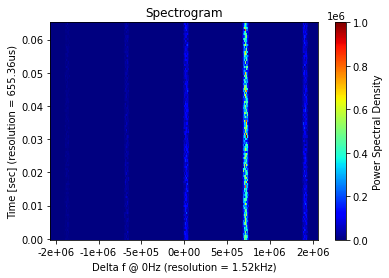

In [9]:
plot_spectrogram(xx, yy, zz)

make an averaged spectrogram then plot it:

In [10]:
xa, ya, za = get_averaged_spectrogram(xx, yy, zz, every= 10)

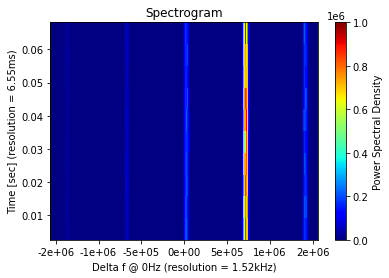

In [11]:
plot_spectrogram(xa, ya, za)

make a single FFT over the whole range, set the window before if you like:

In [12]:
iq.window='bartlett'
ff, pp,_ = iq.get_fft()

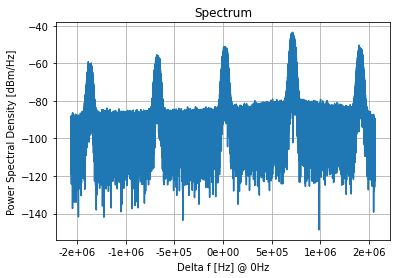

In [13]:
plot_spectrum(ff, pp, dbm=True)

### Synthesis of signals

Here you can create a synthetic signal for test purposes:

In [14]:
fs = 22050
f = 400
center = 133
t, x = make_test_signal(400, 22050, noise=False, nharm=2)

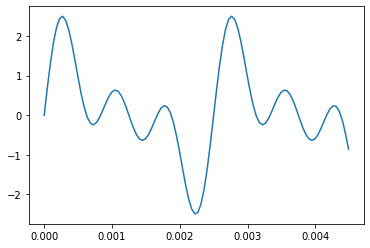

In [15]:
plt.plot(t[:100], x[:100])

In [16]:
xbar , insph = make_analytical(x)

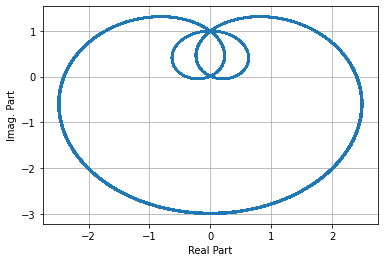

In [17]:
plot_hilbert(xbar)

In [18]:
write_signal_to_bin(xbar, 'results', fs=fs, center=center)

In [21]:
write_signal_to_csv(xbar, 'results', fs=fs, center=center)